# Homework 4 - not twitter alternative

# Problem 1:

This is a request-GET / request-POST problem.

You need to open:
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm

Right click on the search window, inspect element.  Then fill in search window with "prednisone" and click search.  You will see a new page comes up with the results.  That page has a different URL, and it does not contain "prednisone".  This means you have to submit the search data with a JavaScript post.  Copy this URL of the search results page. This is the URL you will post the request to for the search.

### POST forms
POST forms do not put the data in the URL, the data is submitted via javascript. You have to pretend to fill out the form and submit it. 

### Grabbing the parameters:

First we need to find out what parameters we’re going to hunt down. To do this, first make your way to the form, then get prepared.

1) In Chrome, more tools > Developer Tools 2) Click the Network tab 3) Fill the form out on the web page, and submit it 4) Scroll up to the top of the Network pane, select the segment of the URL you’re at (I’m at event.cfm?Event-BasicSearch) 5) Click it 6) Select payload on the right 7) Scroll down until you see Form Data.

The form data says 'searchterm=prednisone&search=' or if you select view parsed, it has "searchterm:prednisone" and on the next line "search: ".  This means we need to make a dictionary with this information.

post_params = {'searchterm': 'prednisone', 'search':''}

Then we load the url and post the request to the search results page:

url = 'https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=BasicSearch.process'

response = requests.post(url, data=post_params)

You will get 14 results.
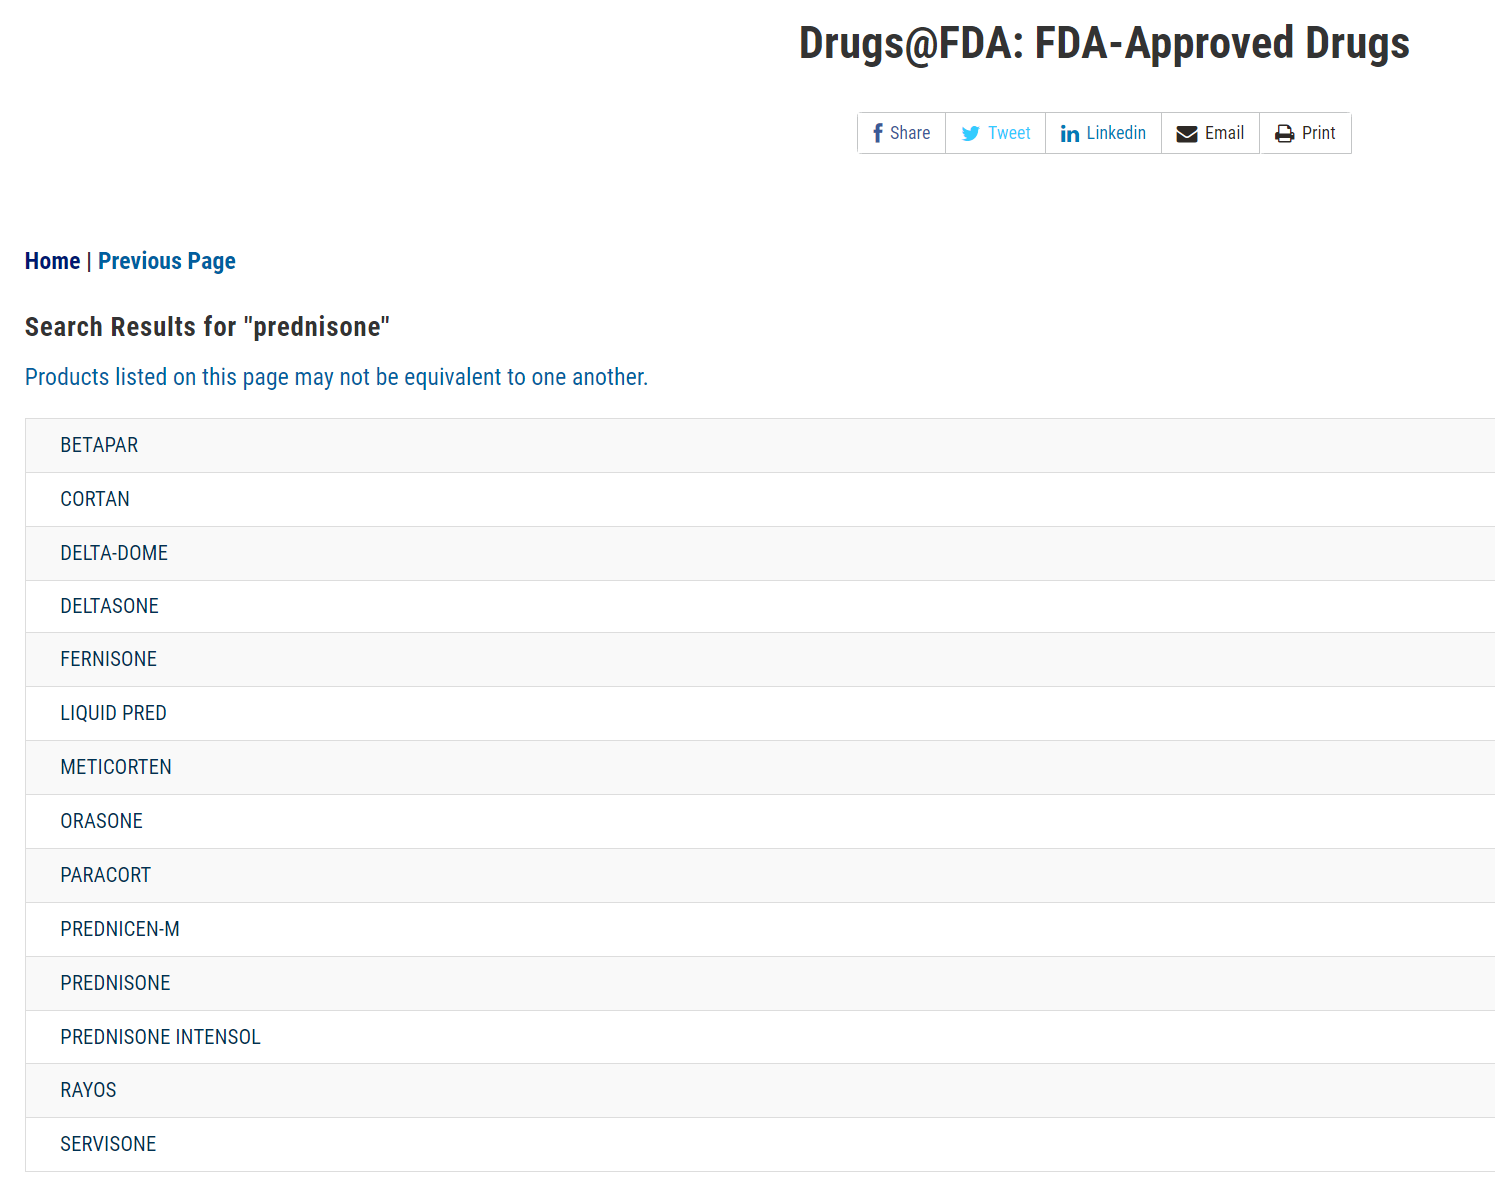

Your software should go to each search result detail page by parsing the table, then table rows from the results (the first click expands the row, second click takes you to the detail page for that drug).  Since you can get the link to the detail page from the HTML, you don't have to worry about the "expand row" click in your code.  Each drug in the search results has a table row with the link to the details page.  Make sure you only get the hyperlinks for the drug detail page since there are lots of links on the page.  On the detail page for the drug, you will get more information about the drug.

The detail page looks like this:
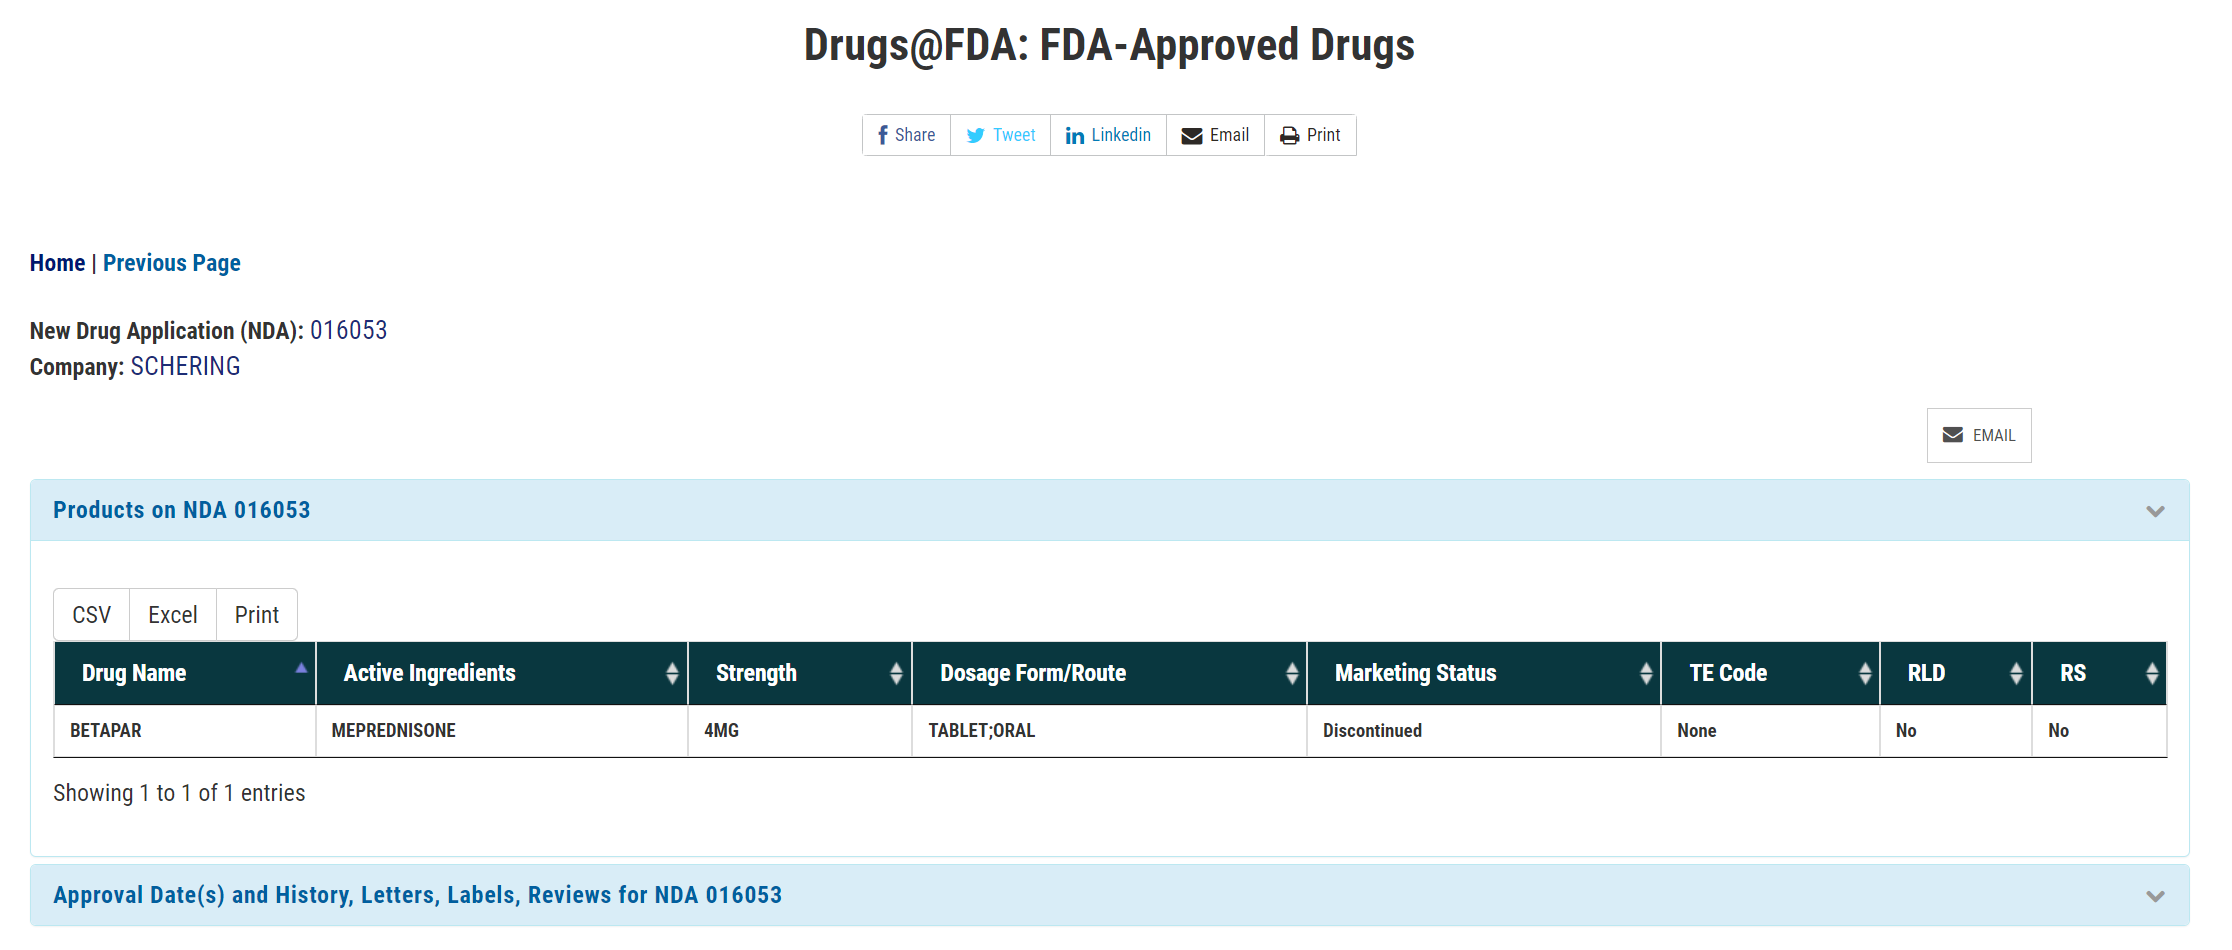

Get this table data for all 14 drugs and print out a single pandas dataframe with all eight columns for all 14 drugs.  The first two rows of the table should look like this:

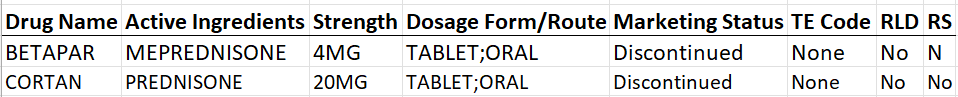

In [3]:
#import the necessary packages
import requests
from bs4 import BeautifulSoup

In [4]:
url = 'https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=BasicSearch.process'
post_params = {'searchterm': 'prednisone','sear':''}
response = requests.post(url, data=post_params)
print(response.text)



 


    



   

    




	

<!DOCTYPE html>
<html lang="en" style="" xmlns="http://www.w3.org/1999/xhtml">
<head>
  <meta http-equiv="X-UA-Compatible" content="IE=EDGE, chrome=1" />	
  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
  <meta name="dc.title"content="Drugs@FDA: FDA-Approved Drugs" />
  <meta name="dc.type" content="" />
  <meta name="dc.description" content="" />
  <meta name="dc.language" content="" />
  <meta name="posted" content="" />
  <meta name="Keywords" content="" />
  <meta name="Description" content="" />
  <meta name="google-site-verification" content="wxQkNTrqmvYnwVcNzA2mspBp7EDErzIhAzyX-YvvRWI" /> 
  <meta name="ROBOTS" content="noindex, nofollow" />
   	
  
  
  	
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta name="apple-mobile-web-app-title" content="FDA">
  <meta name="apple-mobile-web-app-capable" content="yes">

   
	  <title>Drugs@FDA: FDA-Approved Drugs</title>
	 
   
	<link rel="stylesheet" me

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')
rows=soup.find('table', summary="Layout table showing Drug Names").find_all('tr')
print(rows[0])

<tr>
<td>
<div class="col-md-12">
<a data-parent="#accordion1" data-toggle="collapse" href="#drugName1" title="Click to expand drug name">
<span class="list-unstyled" style="text-decoration: none;"></span> BETAPAR 
		</a>
<ul class="collapse" id="drugName1">
<li><a href="/scripts/cder/daf/index.cfm?event=overview.process&amp;ApplNo=016053" title="Click to view BETAPAR (MEPREDNISONE) | NDA   #016053 | TABLET;ORAL | Discontinued | SCHERING">BETAPAR (MEPREDNISONE)</a> | NDA   #016053 | TABLET;ORAL | Discontinued | SCHERING
</li>
</ul>
</div>
</td>
</tr>


In [6]:
baselink = 'https://www.accessdata.fda.gov'
fullurl = []
for row in rows:
    rows2 = row.find_all("a", title=lambda text: "Click to view" in text)
    print(rows2)
    drugname = row.find("a").text.strip()
    print(row.find("a").text.strip())
    print("END OF ROW")
    for row2 in rows2:
        newurl = row2['href']
        print(newurl)
    fullurl.append(baselink + newurl)
print(fullurl)

[<a href="/scripts/cder/daf/index.cfm?event=overview.process&amp;ApplNo=016053" title="Click to view BETAPAR (MEPREDNISONE) | NDA   #016053 | TABLET;ORAL | Discontinued | SCHERING">BETAPAR (MEPREDNISONE)</a>]
BETAPAR
END OF ROW
/scripts/cder/daf/index.cfm?event=overview.process&ApplNo=016053
[<a href="/scripts/cder/daf/index.cfm?event=overview.process&amp;ApplNo=087480" title="Click to view CORTAN (PREDNISONE) | ANDA  #087480 | TABLET;ORAL | Discontinued | HALSEY">CORTAN (PREDNISONE)</a>]
CORTAN
END OF ROW
/scripts/cder/daf/index.cfm?event=overview.process&ApplNo=087480
[<a href="/scripts/cder/daf/index.cfm?event=overview.process&amp;ApplNo=080293" title="Click to view DELTA-DOME (PREDNISONE) | ANDA  #080293 | TABLET;ORAL | Discontinued | BAYER PHARMS">DELTA-DOME (PREDNISONE)</a>]
DELTA-DOME
END OF ROW
/scripts/cder/daf/index.cfm?event=overview.process&ApplNo=080293
[<a href="/scripts/cder/daf/index.cfm?event=overview.process&amp;ApplNo=009986" title="Click to view DELTASONE (PREDNISON

In [7]:
import pandas as pd

df = pd.DataFrame()

for url in fullurl:
    response = requests.post(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    rows= soup.find('table', summary="FDA Approved Drug Products").find('tbody')
    rows = rows.find_all('tr')
    for row in rows:
        drug = row.find_all('td')
        rowlist = []
        for d in drug:
            rowlist.append(d.text.strip())
        tempdf=pd.DataFrame([rowlist])
        df = pd.concat([df, tempdf], axis=0)
        
df.columns = ['Drug Name', 'Active Ingredients', 'Strength', 'Dosage Form/Route', 'Marketing Status','TE Code', 'RLD', 'RS' ]
df

,Drug Name,Active Ingredients,Strength,Dosage Form/Route,Marketing Status,TE Code,RLD,RS
0,BETAPAR,MEPREDNISONE,4MG,TABLET;ORAL,Discontinued,None,No,No
0,CORTAN,PREDNISONE,20MG,TABLET;ORAL,Discontinued,None,No,No
0,DELTA-DOME,PREDNISONE,5MG,TABLET;ORAL,Discontinued,None,No,No
0,DELTASONE,PREDNISONE,5MG **Federal Register determination that prod...,TABLET;ORAL,Discontinued,None,Yes,No
0,DELTASONE,PREDNISONE,2.5MG **Federal Register determination that pr...,TABLET;ORAL,Discontinued,None,Yes,No
0,DELTASONE,PREDNISONE,10MG **Federal Register determination that pro...,TABLET;ORAL,Discontinued,None,Yes,No
0,DELTASONE,PREDNISONE,20MG **Federal Register determination that pro...,TABLET;ORAL,Discontinued,None,Yes,No
0,DELTASONE,PREDNISONE,50MG **Federal Register determination that pro...,TABLET;ORAL,Discontinued,None,Yes,No
0,FERNISONE,PREDNISONE,5MG,TABLET;ORAL,Discontinued,None,No,No
0,LIQUID PRED,PREDNISONE,5MG/5ML,SYRUP;ORAL,Discontinued,None,No,No


# Problem 2

This will require selenium.  See instructions for installing selenium and the drivers for Chrome/Firefox/etc here: https://selenium-python.readthedocs.io/installation.html#introduction

Your software will open the FCC advanced license search page:  https://wireless2.fcc.gov/UlsApp/UlsSearch/searchAdvanced.jsp

Your code will search (not geosearch) for "WY - 700 MHz Lower Band (Blocks A, B & E)" where the licensee address is in Alaska and the license is active.  This means you will use selenium to make all the selections on the page, then click the search button.  See the yellow highlights to see what the page should look like before you click search:
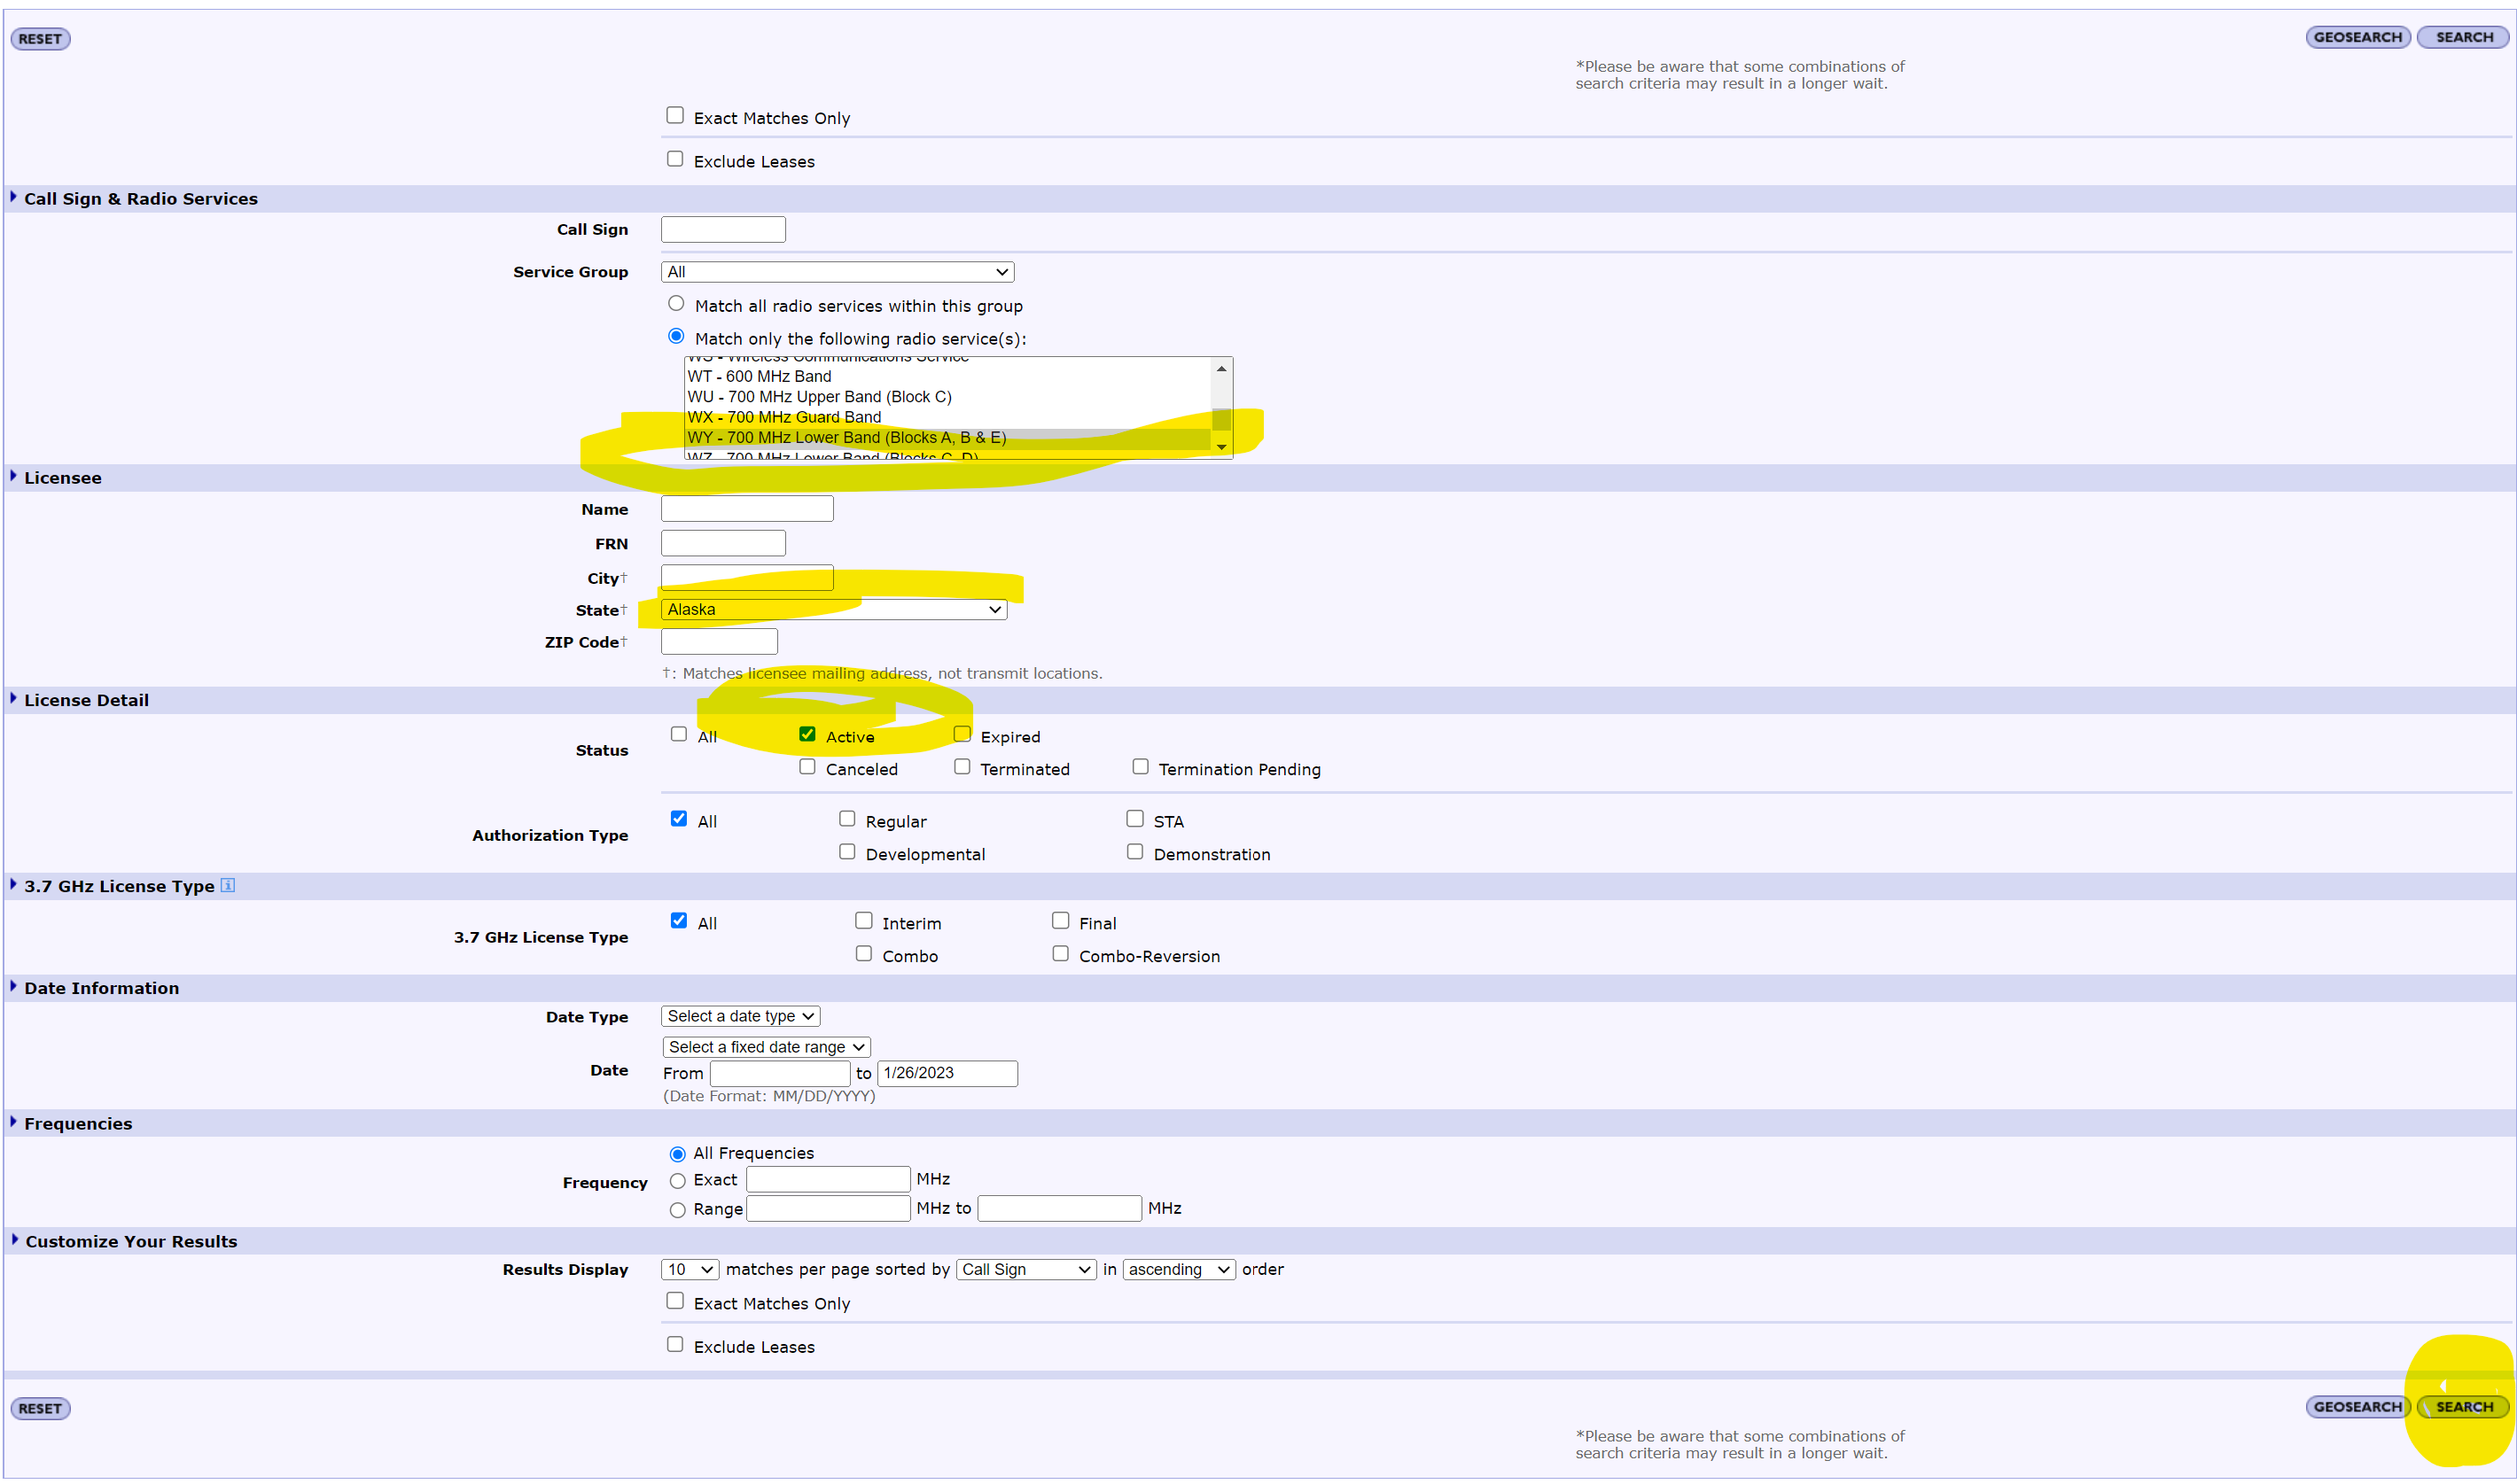

The results show up on one page.
Your software will go through each license and follow on the link to the license page:
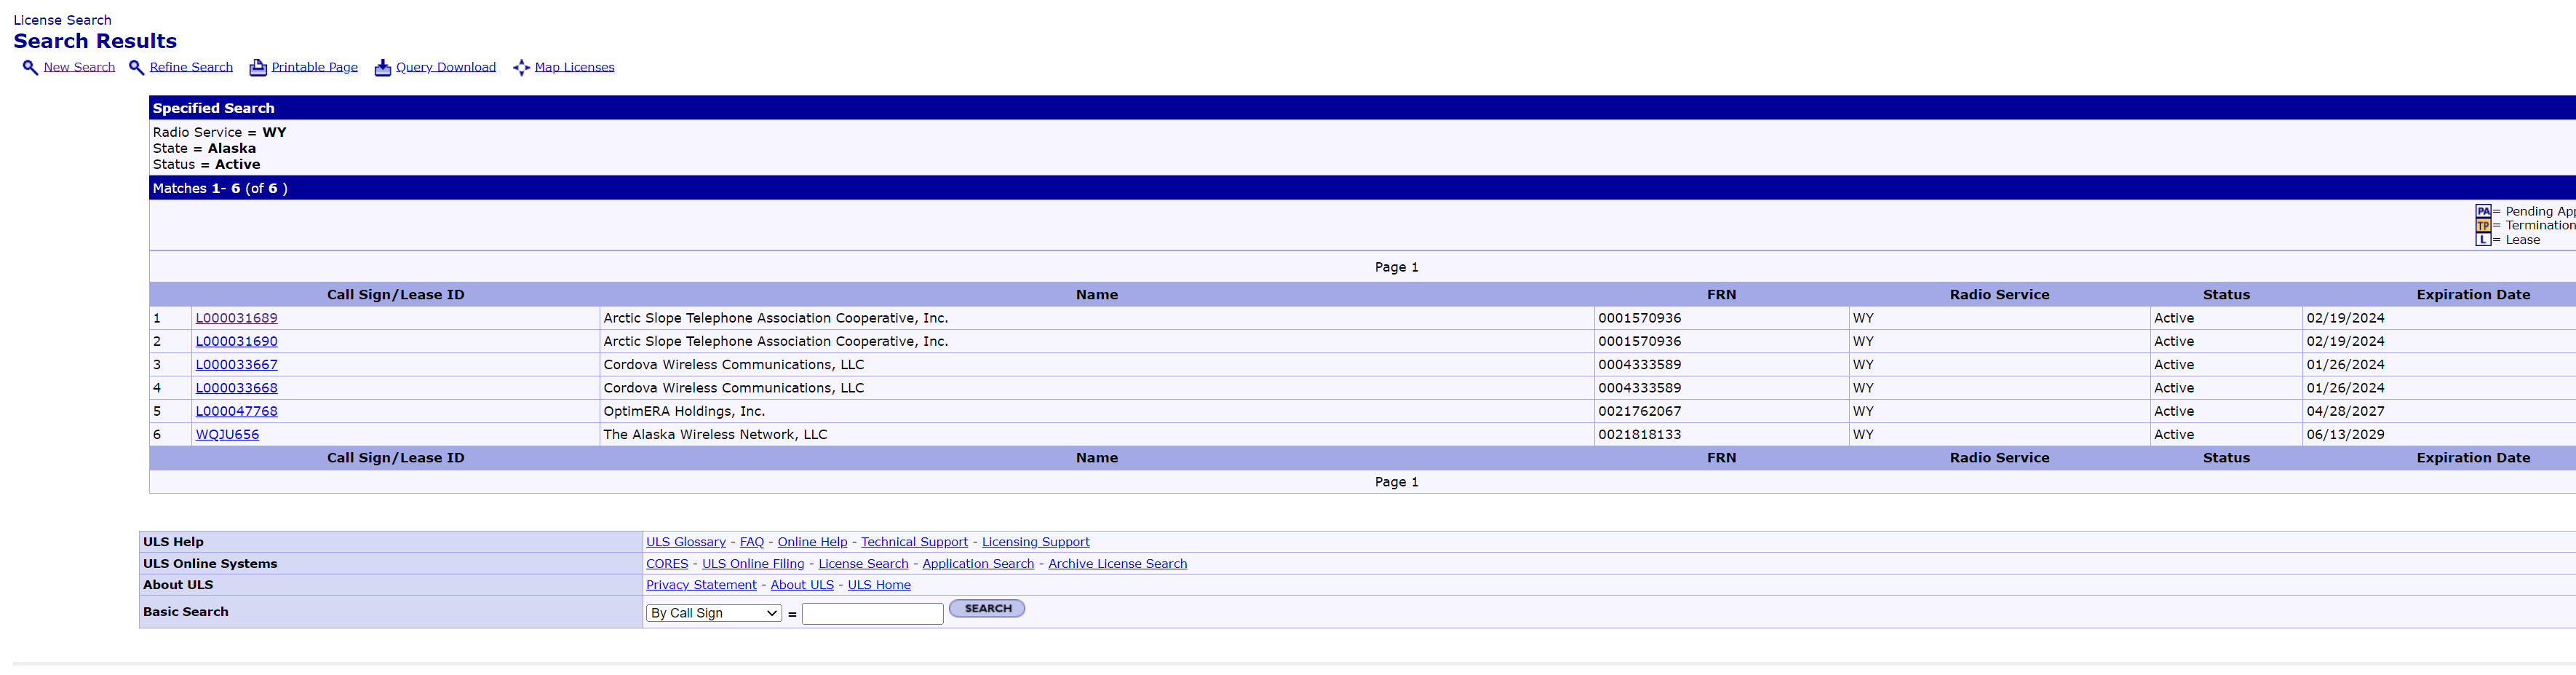

Get the Call Sign/Lease ID and Name from the search results page and then follow the Call Sign/Lease ID link to the page that has the contact information.  The contact information has two parts, get all the information including name, phone number, etc. and concatenate it into a single string.  

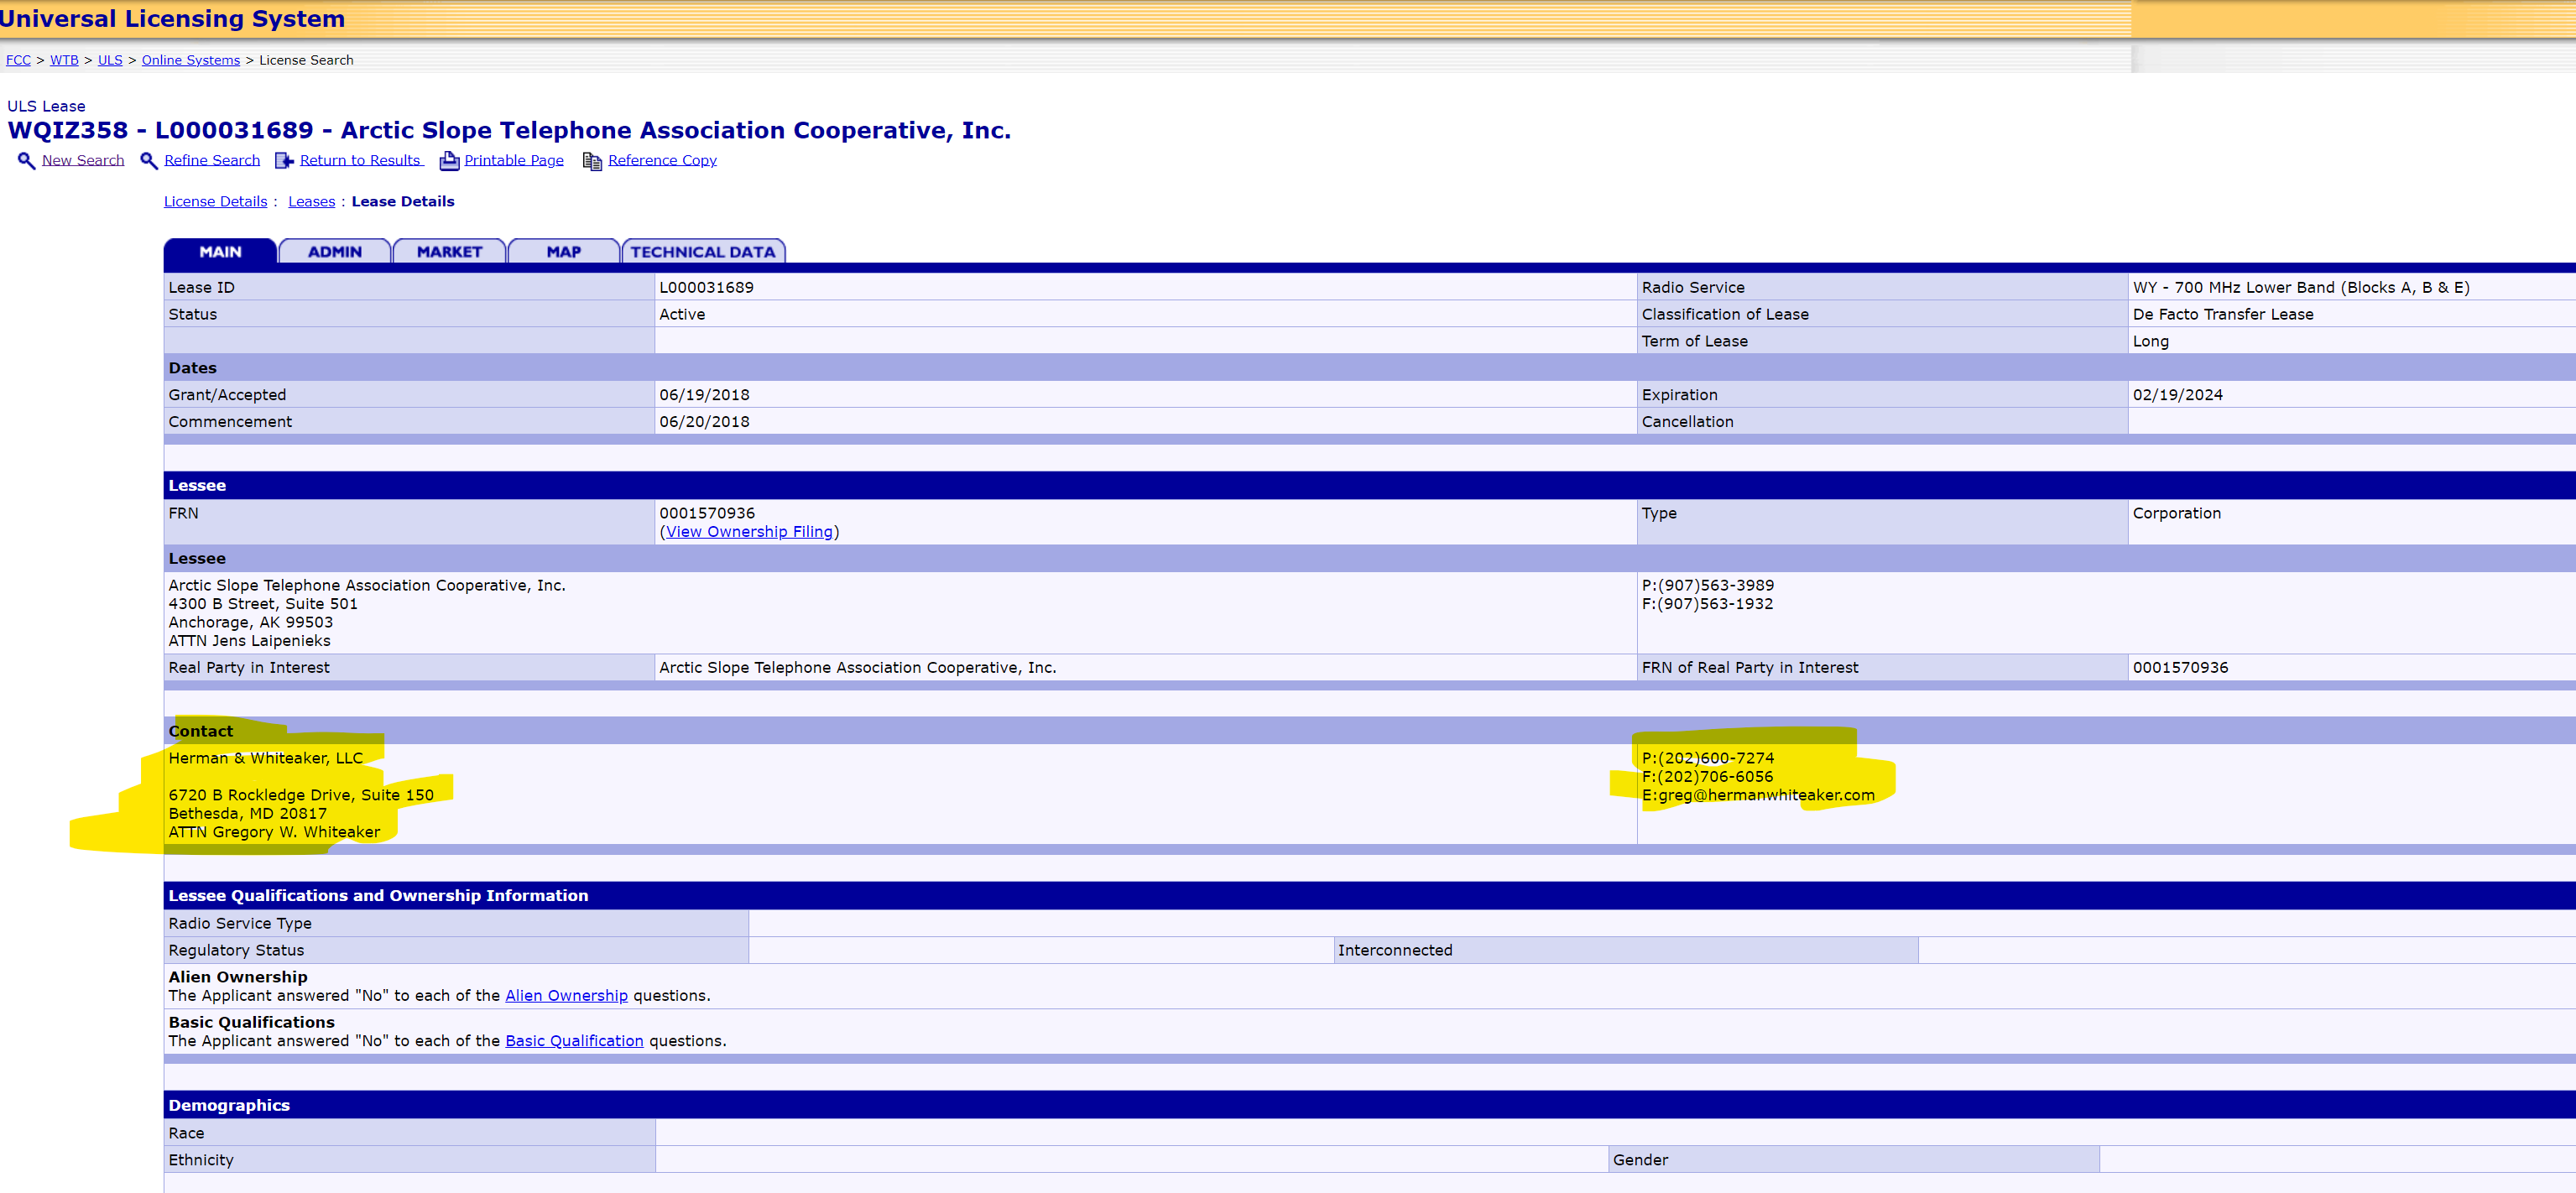

Print out a pandas dataframe with the following columns:
        Call Sign/Lease ID, Name, Contact Information
The contact info can be concatenated into one string.  There should be one row, three columns per license, six licenses total.  The FCC web page can be slow, especially during the work day.  The first row of data should look like this:
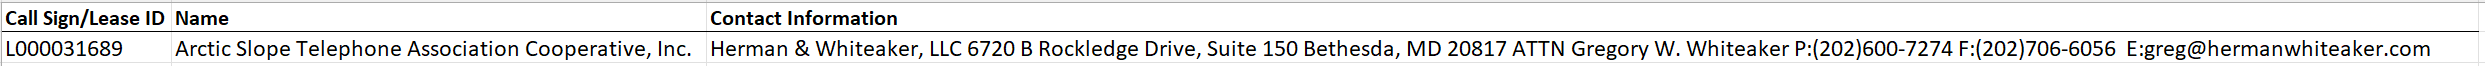

In [1]:
from selenium.webdriver import Chrome
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
import time

In [11]:
driver= webdriver.Chrome()
driver.get('https://wireless2.fcc.gov/UlsApp/UlsSearch/searchAdvanced.jsp')
radioservice = driver.find_element(By.NAME,"fiRadioServiceMatchAllInd")
radioservice.click()
radioservicecode = Select(driver.find_element(By.NAME,"radioservicecode"))
radioservicecode.select_by_index(111)

state = Select(driver.find_element(By.NAME,"ulsState"))
state.select_by_index(2)
active = driver.find_element(By.NAME,"AActive")
active.click()
searchbutton=driver.find_element(By.CSS_SELECTOR, '[alt="Search"]')
searchbutton.click()

time.sleep(10)
ps=driver.page_source
doc=BeautifulSoup(ps, "html.parser")
print(doc)

<html lang="en"><head><script language="javascript1.2" type="text/javascript">
/////////////////////////////////////
// JavaScript needed for
// ULS footer search
// for dynamic include into external-footer.html
// requires formUtils.jsp to be included in all pages
// Author: JVS
// Date  : 1/02/02
//
////////////////////////////////////

////////////////////////////////////
// function validateFooter
// accepts the form object
// validate the form
// stores all error messgages
// to alert user with single alert at end
////////////////////////////////////
var submitOnce = true;
function validateFooter(form)
{

    var alertString = "";
    var tmp = "";
	if (submitOnce == false)
	{
		return false;
		
	}
    //only 10 digit frn
    if (getSelectValue(form.fiUlsSearchByType).indexOf("uls_l_frn") > -1)
    {
		tmp = frnValidateSearch(form.fiUlsSearchByValue.value);
		if (tmp)
		{
			alertString += tmp;
		}
    }//end if

    //only 9 lic id
    if ((getSelectValue(form.fiUlsSearchByType).

In [16]:
rows = doc.find('table', summary='License search results').find_all('tr', attrs={'class':None})

licenses = []

for row in rows:
    if 'style' in row.attrs:
        pass
    else:
        try:
            link = ''
            lease = ''
            cells = row.find_all("td")
            href = row.find_all("a")
            ownlink = 'https://wireless2.fcc.gov/UlsApp/UlsSearch/license.jsp?licKey='
            leaselink = 'https://wireless2.fcc.gov/UlsApp/UlsSearch/leaseMain.jsp?licKey='
            if len(href) > 0:
                if "license.jsp" in str(href[0]):
                    link = ownlink + str(href[0]).split("licKey=")[1].split("\"")[0]
                elif "leaseMain.jsp" in str(href[0]):
                    link = leaselink +str(href[0]).split("licKey=")[1].split("\"")[0]
                else:
                    pass
            img = row.find_all("img")
            if len(img) > 0:
                if "alt=\"Lease\"" in str(img[0]):
                    lease = "Leased"
            temp = {
                'row': cells[0].text.strip(),
                'Call Sign Lease ID': cells[1].text.strip(),
                'Name': cells[2].text.strip(),
                'Link': link,
                'FRN': cells[3].text.strip(),
                'Radio Service': cells[4].text.strip(),
                'Status': cells[5].text.strip(),
                'Expiration Date': cells[6].text.strip(),
                'Leased out': lease
            }
            licenses.append(temp)
        except:
            pass
df = pd.DataFrame(licenses)
df

,row,Call Sign Lease ID,Name,Link,FRN,Radio Service,Status,Expiration Date,Leased out
0,1,L000031689,Arctic Slope Telephone Association Cooperative...,https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0001570936,WY,Active,02/19/2024,
1,2,L000031690,Arctic Slope Telephone Association Cooperative...,https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0001570936,WY,Active,02/19/2024,
2,3,L000033667,"Cordova Wireless Communications, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0004333589,WY,Active,01/26/2024,
3,4,L000033668,"Cordova Wireless Communications, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0004333589,WY,Active,01/26/2024,
4,5,L000047768,"OptimERA Holdings, Inc.",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0021762067,WY,Active,04/28/2027,
5,6,WQJU656,"The Alaska Wireless Network, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lic...,0021818133,WY,Active,06/13/2029,


In [18]:
driver = webdriver.Chrome()
def getcontact(row):
    driver.get(row['Link'])
    ps = driver.page_source
    doc = BeautifulSoup(ps, "html.parser")
    try:
        rows = doc.find('table', summary= 'Lessee Information table').find_all('tr',attrs={'class':None})
    except:
        rows = doc.find('table', summary='Licensee information table').find_all('tr', attrs={'class':None})
    contactflag=0
    for row in rows:
        contact=''
        cells=row.find_all("td")
        for cell in cells:
            if (contactflag == 1) or (contactflag == 2):
                contact += cell.text.strip().replace('\n', ' ')
                contactflag += 1
            if cell.text.strip() == 'Contact':
                contactflag = 1
            if contactflag == 3:
                return contact
    return 'null'

df['Contact Information'] = df.apply(getcontact, axis = 1)
df

,row,Call Sign Lease ID,Name,Link,FRN,Radio Service,Status,Expiration Date,Leased out,Contact Information
0,1,L000031689,Arctic Slope Telephone Association Cooperative...,https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0001570936,WY,Active,02/19/2024,,"Herman & Whiteaker, LLC 6720 B Rockledge Driv..."
1,2,L000031690,Arctic Slope Telephone Association Cooperative...,https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0001570936,WY,Active,02/19/2024,,"Herman & Whiteaker, LLC 6720 B Rockledge Driv..."
2,3,L000033667,"Cordova Wireless Communications, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0004333589,WY,Active,01/26/2024,,"Law Firm of Kenneth C. Johnson, PLLC 10608 Re..."
3,4,L000033668,"Cordova Wireless Communications, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0004333589,WY,Active,01/26/2024,,"Law Firm of Kenneth C. Johnson, PLLC 10608 Re..."
4,5,L000047768,"OptimERA Holdings, Inc.",https://wireless2.fcc.gov/UlsApp/UlsSearch/lea...,0021762067,WY,Active,04/28/2027,,"Lukas, LaFuria, Lantor & Sachs, LLP P.O. Box ..."
5,6,WQJU656,"The Alaska Wireless Network, LLC",https://wireless2.fcc.gov/UlsApp/UlsSearch/lic...,0021818133,WY,Active,06/13/2029,,"Harris, Wiltshire & Grannis LLP Randall W Sif..."


In [20]:
df = df[['Call Sign Lease ID', 'Name', 'Contact Information']]
df

,Call Sign Lease ID,Name,Contact Information
0,L000031689,Arctic Slope Telephone Association Cooperative...,"Herman & Whiteaker, LLC 6720 B Rockledge Driv..."
1,L000031690,Arctic Slope Telephone Association Cooperative...,"Herman & Whiteaker, LLC 6720 B Rockledge Driv..."
2,L000033667,"Cordova Wireless Communications, LLC","Law Firm of Kenneth C. Johnson, PLLC 10608 Re..."
3,L000033668,"Cordova Wireless Communications, LLC","Law Firm of Kenneth C. Johnson, PLLC 10608 Re..."
4,L000047768,"OptimERA Holdings, Inc.","Lukas, LaFuria, Lantor & Sachs, LLP P.O. Box ..."
5,WQJU656,"The Alaska Wireless Network, LLC","Harris, Wiltshire & Grannis LLP Randall W Sif..."
